In [10]:
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
#%matplotlib widget

In [12]:
def pca_with_n(X,j):
    
    #j is no of feature in reduced matrix 
    #X is our original dataset
    
    #Column mean of matrix X
    M = np.mean(X, axis = 0)
    m,n = X.shape
    print('Original matrix:\n',X)
    print('Column Mean',M,'\n')
    
    #X_t is temporary matrix for calculation
    X_t = X.T
    print('Transpose of original matrix:\n',X_t,'\n')
    
    #X_c is centred matrix
    for i in range(n):
        X_t[i] = X_t[i] - M[i]
    X_c = X_t.T
    print('Centred matrix:\n',X_c,'\n')
    
    #X_cov is covariance matrix
    X_cov = 0.5*np.dot(X_c.T, X_c)
    print('Covariance Matrix:\n',X_cov,'\n')
    
    #Calculation of eigen_value and eigen_vectors using linear algebra library.
    #eigh () return eigen values in asc order and its corresponding eigen vectors
    eigen_values,eigen_vectors = np.linalg.eig(X_cov)
    print('Eigen values:',np.round(eigen_values),'\n')
    print('Eigen_vectors:\n',eigen_vectors,'\n')
    
    #fractional eigen value for purpose or accuracy matching
    eigen_valuef = eigen_values/np.sum(eigen_values)
    
    #Evaluation of %age of information
    sum = 0
    for k in range(j):
        sum=sum+eigen_valuef[k]

    tranfer_vector = eigen_vectors[0:j]
    
    return (np.dot(X, tranfer_vector.T), sum*100)

In [3]:
def ascii_sum(string):
    sum_ = 0
    for char in string:
        sum_ = sum_ + ord(char)
    return sum_

In [4]:
def make_data(name, roll, marks):
    mat = np.zeros((5,3))
    m,n = mat.shape
    a = ascii_sum(name)
    b = ascii_sum(roll)
    c = marks
    row1 = np.array([a,b,c])
    diff = np.array([100,50,1])
    for i in range(m):
        if i==0:
            mat[i]=row1
        else:
            mat[i] = mat[i-1]+diff
    
    return mat    

In [5]:
name = input('Enter your name:').strip()
roll = input('Enter Roll nomber:').strip()
marks = float(input('Enter your mid-sem mark:'))

Enter your name:Imran
Enter Roll nomber:ME21B2016
Enter your mid-sem mark:20


In [6]:
data = make_data(name,roll, marks)

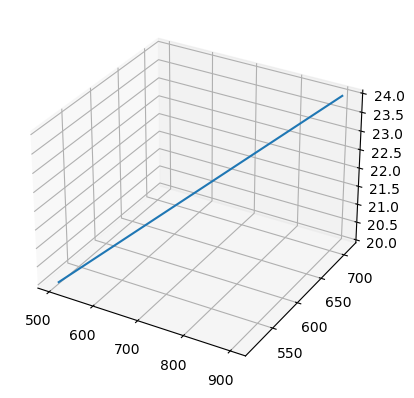

In [8]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(data[:,0],data[:,1],data[:,2])

In [13]:
pca_with_n(data,2)

Original matrix:
 [[-200. -100.   -2.]
 [-100.  -50.   -1.]
 [   0.    0.    0.]
 [ 100.   50.    1.]
 [ 200.  100.    2.]]
Column Mean [0. 0. 0.] 

Transpose of original matrix:
 [[-200. -100.    0.  100.  200.]
 [-100.  -50.    0.   50.  100.]
 [  -2.   -1.    0.    1.    2.]] 

Centred matrix:
 [[-200. -100.   -2.]
 [-100.  -50.   -1.]
 [   0.    0.    0.]
 [ 100.   50.    1.]
 [ 200.  100.    2.]] 

Covariance Matrix:
 [[5.00e+04 2.50e+04 5.00e+02]
 [2.50e+04 1.25e+04 2.50e+02]
 [5.00e+02 2.50e+02 5.00e+00]] 

Eigen values: [62505.     0.    -0.] 

Eigen_vectors:
 [[ 8.9439e-01  4.4729e-01 -1.9525e-06]
 [ 4.4720e-01 -8.9421e-01 -1.9992e-02]
 [ 8.9439e-03 -1.7884e-02  9.9980e-01]] 



(array([[-2.2361e+02,  2.2102e-02],
        [-1.1180e+02,  1.1051e-02],
        [ 0.0000e+00,  0.0000e+00],
        [ 1.1180e+02, -1.1051e-02],
        [ 2.2361e+02, -2.2102e-02]]),
 100.0)